# **Introduction**

This is my approach on the Google Data Analytics Capstone – Case Study 2: How Can a Wellness Technology Company Play It Smart?
I have taken the Data Analyst steps:

* Ask
* Prepare
* Process
* Analyze
* Share
* Act

These steps will be outlined in this Notebook.

# **Scenario**

I am a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights I discover will then help guide marketing strategy for the company. I will present my analysis to the Bellabeat executive team along with my high-level recommendations for Bellabeat’s marketing strategy.

## **ASK**

This step of the process involves asking SMART (Specific, Measureable, Action-Oriented, Relevant, and Time-bound) questions, as well as, understanding Stakeholder expectiations. The following questions will help achieve that:

**1. What are some trends in smart device usage?**

**2. How could these trends apply to Bellabeat customers?**

**3. How could these trends help influence Bellabeat marketing strategy?**

#### **Guiding Questions**

**1. What is the problem you are trying to solve?**

The problem to be solved is to gain insight into how non-Bellabeat customers use smart devices to find trends that can be used to create high level recommendations for a strategy for the Bellabeat marketing team for Bellabeat products

**2. How can your insights drive business decisions?**

My insights will help Bellabeat achieve more business to grow in their current field and be a force to be reckoned with.

#### **Key Tasks** 

**1. Identify the business task**

To provide high-level recommendations that can be applied to one of Bellabeat’s current products’ marketing strategy by investigating existing smart device trends of non Bellabeat smart devices.

**2. Consider key stakeholders**

**Primary stakeholder:**

Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer

Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

**Secondary stakeholder:**

Bellabeat marketing analytics team

## **PREPARE**
Here we are importing the data provided into JupyterLab to get prepared to be processed and analyzed.
Data Source Used In This Project can be found [here](https://www.kaggle.com/datasets/arashnic/fitbit?select=Fitabase+Data+4.12.16-5.12.16).

### Setting up my environment
Here I'm setting up my environment by installing and loading pandas and other packages to help me with analysis

In [1]:
#installing the packages needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset
Here I am importing the 'dailyActivity_merged.csv', 'hourlySteps_merged', and 'hourlycalories_merged' dataset into Python from the Fitbit Dataset Archive located [here](https://www.kaggle.com/datasets/arashnic/fitbit?select=Fitabase+Data+4.12.16-5.12.16) I was going to do 'sleepDay' as well, but it turns out it doesn't include all the participants.

In [2]:
#Importing data set
da = pd.read_csv("dailyActivity_merged.csv")
h_step = pd.read_csv("hourlysteps_merged.csv")
h_cal = pd.read_csv("hourlycalories_merged.csv")
sd = pd.read_csv("sleepDay_merged.csv")

In [3]:
da.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
h_step.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [5]:
h_cal.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [6]:
h_cal.shape

(22099, 3)

In [7]:
h_step.shape

(22099, 3)

In [8]:
da.shape

(940, 15)

In [9]:
da.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [10]:
h_step.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [11]:
h_cal.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

## Process
Next it's time to clean and transform the data so it can be ready to analyze. First we clean it with Python tools.

### Cleaning Data
After checking the shape and data types, we're going to combine the hourly steps and calories then change the ActivityHour to Date and change the format. Next changing the format for the daily activities dataframe and checking for missing values for all the data frames. After that, we will drop the columns we don't need for analysis.

In [12]:
#Merging the hourly dataframes to have the steps and calories in one DF.
h_merged = pd.merge(h_step, h_cal, on=["Id","ActivityHour"], how="inner")

In [13]:
#Making sure the size of the dataframe is still the same
h_merged.shape

(22099, 4)

In [14]:
h_merged.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,4/12/2016 12:00:00 AM,373,81
1,1503960366,4/12/2016 1:00:00 AM,160,61
2,1503960366,4/12/2016 2:00:00 AM,151,59
3,1503960366,4/12/2016 3:00:00 AM,0,47
4,1503960366,4/12/2016 4:00:00 AM,0,48


In [15]:
#Formatting the date from object to Date
da['ActivityDate'] = pd.to_datetime(da['ActivityDate'])

In [16]:
h_merged['ActivityHour'] = pd.to_datetime(h_merged['ActivityHour'])

C:\Users\patto\AppData\Local\Temp\ipykernel_888\1626773981.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  h_merged['ActivityHour'] = pd.to_datetime(h_merged['ActivityHour'])


In [17]:
h_merged.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


In [18]:
#Checking to make sure they are formated correctly
da.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [19]:
h_merged.dtypes

Id                       int64
ActivityHour    datetime64[ns]
StepTotal                int64
Calories                 int64
dtype: object

In [20]:
#Checking for null values in all data frames.
da.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [21]:
da.rename(columns = {"ActivityDate": "Date"}, inplace=True)

In [22]:
#Remove unecessary columns.
da.drop(["TrackerDistance", "LoggedActivitiesDistance", "TotalDistance", "SedentaryActiveDistance"], axis=1, inplace=True)

In [23]:
da.head()

,Id,Date,TotalSteps,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,1.88,0.55,6.06,25,13,328,728,1985
1,1503960366,2016-04-13,10735,1.57,0.69,4.71,21,19,217,776,1797
2,1503960366,2016-04-14,10460,2.44,0.40,3.91,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,2.14,1.26,2.83,29,34,209,726,1745
4,1503960366,2016-04-16,12669,2.71,0.41,5.04,36,10,221,773,1863


## **ANALYZE**

Now it's time to move onto the Analyze steps. Here we're going to take a look at the data and see what it tells us. It has been formatted properly and organized how I would like it. I'm going to look for trends and use those insights to answer the business questions.

### Adding Days of the Week 

I want to determine what day of the week the dates are so I can better analyze the data in the next step.

In [24]:
#Creating day of the week column to help with analysis.
da['Day_of_week'] = da['Date'].dt.day_name()

In [25]:
da.head()

,Id,Date,TotalSteps,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_week
0,1503960366,2016-04-12,13162,1.88,0.55,6.06,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,1.57,0.69,4.71,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,2.44,0.40,3.91,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,2.14,1.26,2.83,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,2.71,0.41,5.04,36,10,221,773,1863,Saturday


### Looking at Active and Very Active Minutes

According to the CDC (Centers for Disease Control) and WHO (World Health Organization) adults 18-64 should have at least 150 minutes of moderate-intensity aerobic physical activity, 75 minutes of vigorous-intensity aerobic physical activity, or an equivalent mix of both every week. The links can be found [here](https://www.cdc.gov/physicalactivity/basics/adults/index.htm) for the CDC and and [here](https://www.who.int/news-room/fact-sheets/detail/physical-activity) for the WHO. 

It looks like for the most part, they do correlate with one another. 

Next I want to see if, on average, the Fairly and Very active minutes are where they should be according to the CDC and WHO. Breaking the minutes throughout the week, moderate-intensity per day would be 21.43 mins, vigorous-intensity per day would be 10.71, and an equivalent mix per day would be about 16.07 mins.

In [26]:
#Creating a column with the equivalent minutes mix.
da['MinMix'] = (da['FairlyActiveMinutes'] + da['VeryActiveMinutes']) / 2

In [27]:
da.head()

,Id,Date,TotalSteps,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_week,MinMix
0,1503960366,2016-04-12,13162,1.88,0.55,6.06,25,13,328,728,1985,Tuesday,19.0
1,1503960366,2016-04-13,10735,1.57,0.69,4.71,21,19,217,776,1797,Wednesday,20.0
2,1503960366,2016-04-14,10460,2.44,0.40,3.91,30,11,181,1218,1776,Thursday,20.5
3,1503960366,2016-04-15,9762,2.14,1.26,2.83,29,34,209,726,1745,Friday,31.5
4,1503960366,2016-04-16,12669,2.71,0.41,5.04,36,10,221,773,1863,Saturday,23.0


In [28]:
da_group = da.groupby("Id").agg({"FairlyActiveMinutes":'mean', "VeryActiveMinutes": 'mean', "MinMix": 'mean', "TotalSteps": 'mean',"Calories":'mean'})

In [29]:
da_mins_avg = da_group.reset_index()
da_mins_avg

,Id,FairlyActiveMinutes,VeryActiveMinutes,MinMix,TotalSteps,Calories
0,1503960366,19.161290,38.709677,28.935484,12116.741935,1816.419355
1,1624580081,5.806452,8.677419,7.241935,5743.903226,1483.354839
2,1644430081,21.366667,9.566667,15.466667,7282.966667,2811.300000
3,1844505072,1.290323,0.129032,0.709677,2580.064516,1573.483871
4,1927972279,0.774194,1.322581,1.048387,916.129032,2172.806452
5,2022484408,19.354839,36.290323,27.822581,11370.645161,2509.967742
6,2026352035,0.258065,0.096774,0.177419,5566.870968,1540.645161
7,2320127002,2.580645,1.354839,1.967742,4716.870968,1724.161290
8,2347167796,20.555556,13.500000,17.027778,9519.666667,2043.444444
9,2873212765,6.129032,14.096774,10.112903,7555.774194,1916.967742


In [30]:
da_mins_avg[da_mins_avg.FairlyActiveMinutes > 21.43].count()

Id                     5
FairlyActiveMinutes    5
VeryActiveMinutes      5
MinMix                 5
TotalSteps             5
Calories               5
dtype: int64

In [31]:
da_mins_avg[da_mins_avg.VeryActiveMinutes > 10.71].count()

Id                     16
FairlyActiveMinutes    16
VeryActiveMinutes      16
MinMix                 16
TotalSteps             16
Calories               16
dtype: int64

In [32]:
da_mins_avg[da_mins_avg.MinMix > 16.07].count()

Id                     14
FairlyActiveMinutes    14
VeryActiveMinutes      14
MinMix                 14
TotalSteps             14
Calories               14
dtype: int64

In [33]:
da_mins_avg[da_mins_avg.TotalSteps > 10000].count()

Id                     7
FairlyActiveMinutes    7
VeryActiveMinutes      7
MinMix                 7
TotalSteps             7
Calories               7
dtype: int64

In theory, steps should correlate with calories burned. So I'm going to graph it to make sure that is accurate.

<Axes: xlabel='TotalSteps', ylabel='Calories'>

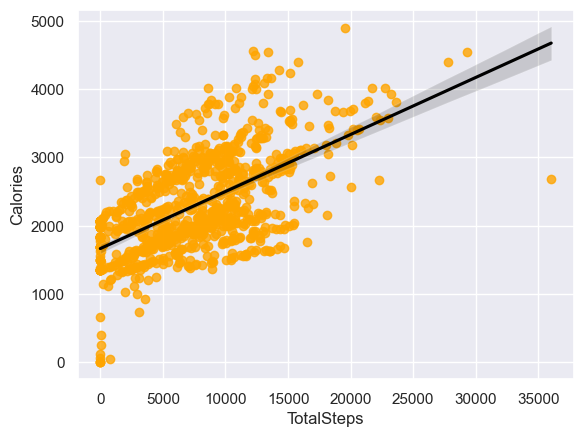

In [34]:
#Confirming steps correlate with calories burned.
sns.set_theme()
sns.regplot(data=da, x= "TotalSteps", y= "Calories", scatter_kws = {"color": "orange"}, line_kws = {"color":"black"})

Next, I'm taking a quick look at the sleep data. It wasn't originally going to be used due to it only have 23 out of the 33 people that were supposed to be using it. But it turns out to be useful in showing that, on average, half the people that did use it got less than the recommened 7 hours. The 7 hours (420 minutes) comes from the National Insitute of Health [here](https://www.nhlbi.nih.gov/health/sleep/how-much-sleep).

In [35]:
sd.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [36]:
sd.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [37]:
sd['SleepDay'] = pd.to_datetime(sd['SleepDay'])

C:\Users\patto\AppData\Local\Temp\ipykernel_888\413052152.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sd['SleepDay'] = pd.to_datetime(sd['SleepDay'])


In [38]:
sd_group = sd.groupby("Id")["TotalMinutesAsleep"].mean()
sd_group = sd_group.reset_index(drop=False)
sd_group

,Id,TotalMinutesAsleep
0,1503960366,360.280000
1,1644430081,294.000000
2,1844505072,652.000000
3,1927972279,417.000000
4,2026352035,506.178571
5,2320127002,61.000000
6,2347167796,446.800000
7,3977333714,293.642857
8,4020332650,349.375000
9,4319703577,476.653846


In [39]:
sd_group[sd_group.TotalMinutesAsleep < 420].count()

Id                    12
TotalMinutesAsleep    12
dtype: int64

<Axes: xlabel='TotalMinutesAsleep', ylabel='TotalTimeInBed'>

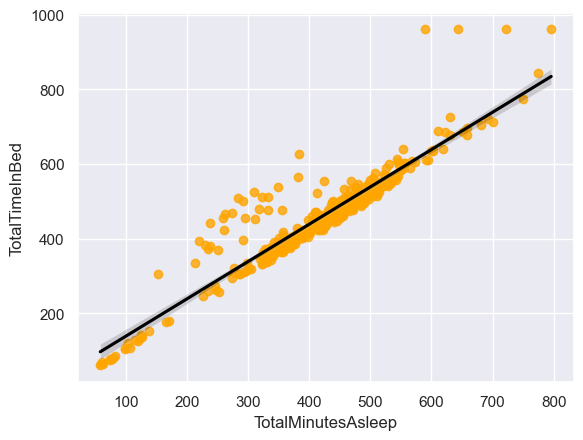

In [40]:
sns.regplot(data = sd, x = "TotalMinutesAsleep", y= "TotalTimeInBed", scatter_kws = {"color": "orange"}, line_kws = {"color":"black"})

## **SHARE**

Now that the data has been analyzed, it's time to move onto the Share phase. During this next step, I will make some visualizations to try and tell the story that the data tells me. 

#### **Key Tasks** 

**1. Determine the best way to share your findings.**

* Create visualizations to show results of analyzing

<Axes: xlabel='MinMix', ylabel='Calories'>

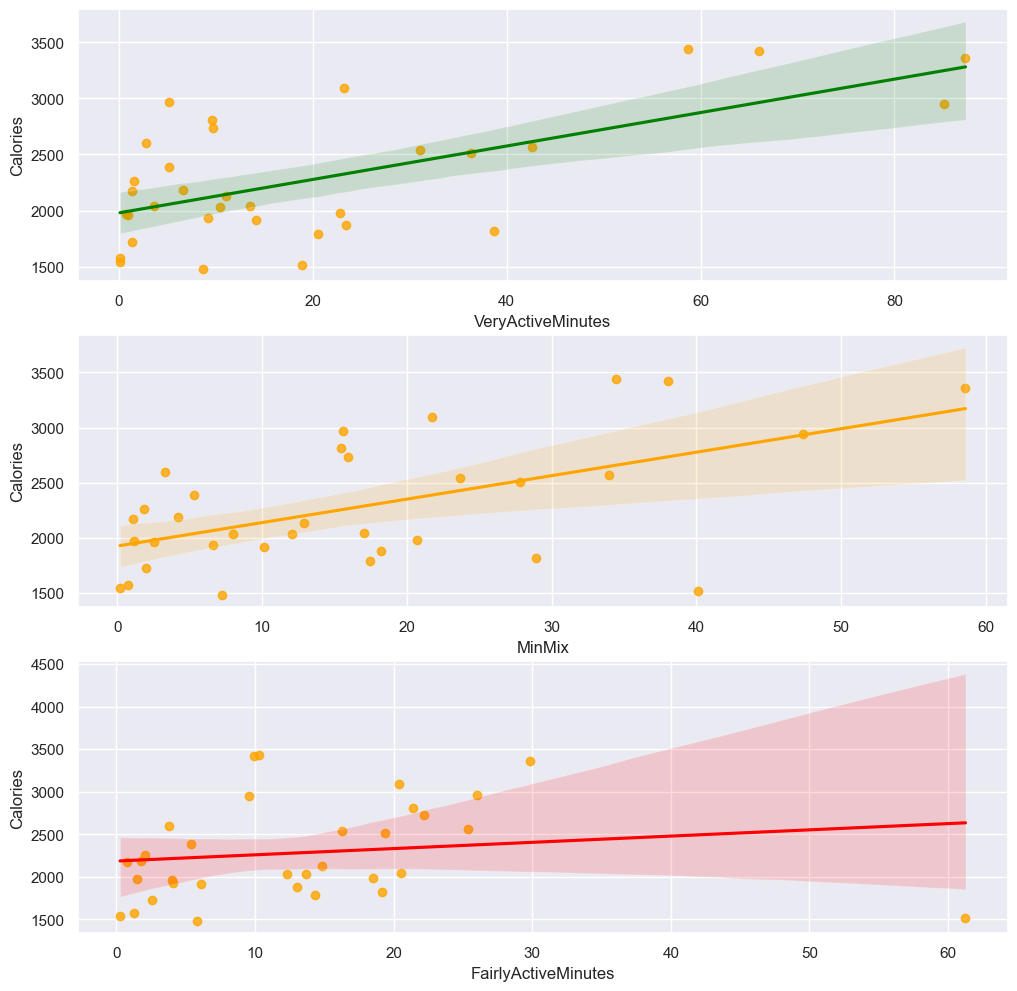

In [41]:
fig, axes = plt.subplots(nrows = 3, figsize=[12,12])
sns.regplot(data=da_mins_avg, x= "VeryActiveMinutes", y = "Calories", ax=axes[0], scatter_kws = {"color": "orange"}, line_kws = {"color":"green"})
sns.regplot(data=da_mins_avg, x= "FairlyActiveMinutes", y = "Calories",ax = axes[2], scatter_kws = {"color": "orange"}, line_kws = {"color":"red"})
sns.regplot(data=da_mins_avg, x= "MinMix", y = "Calories", ax = axes[1], scatter_kws = {"color": "orange"}, line_kws = {"color":"orange"})

**Findings:**
* More calories are burned when people are "Very" active and a mix of "Very" and "Fairly" active compared to just being "Fairly" active.
* Less than half of the people achieved the minimum "Very" and "Fairly" active minutes.
* According to the analysis, people achieved the minimnum needed of activity a day when being "Very" active (about half) and "Mixed" active(also half).
* Only 7 peolpe, on average, achieve their daily step goals
* A little over a fifth of the people, on average, get the recommended 7 hours of sleep. This dataset was missing 8 people.
* There were only 8 people who logged thier weight and not very often.

## **ACT**

Lastly, I will share my recommendations for Bellabeats marketing department.

**Recommendations for Bellabeats:**

* From the lack of people logging their weight, it stands to reason that a possibility could be the lack of effort people want to go through with having to log the weight their self. Other features automatically log the information, so I would recommend having one for weight, as well. A smart scale would take some of the effort out the customer's hands.
* Same automatic logging of sleep would help gather more data on sleep to make future insights more accurate.
* Trends noted with other health tracking technology that has been rising is competition with friends and others on the same app to keep each other accountable for maintaining and achieving their health goals.
* Hourly, daily, and weekly reminders should be considered. To help people keep track of their daily progress, goals should be set for them when they wake. Througout the daily, the app or device will let them know how they are doing according to average or their personal goals. 